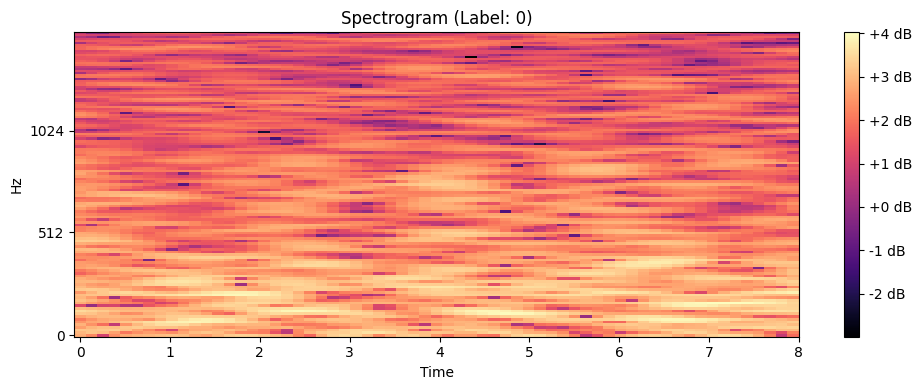

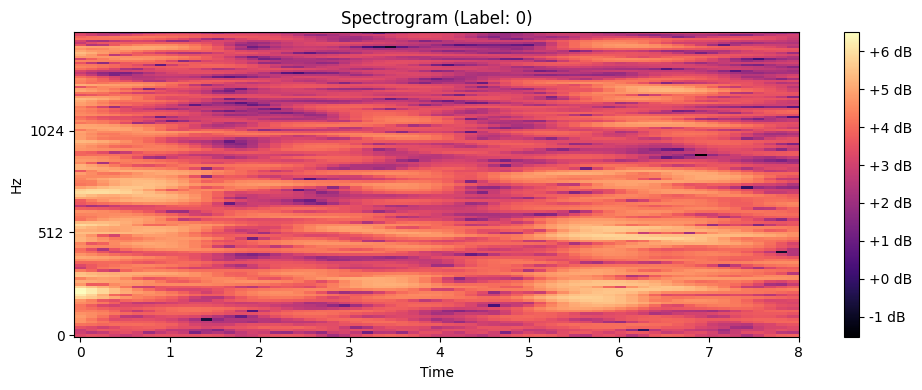

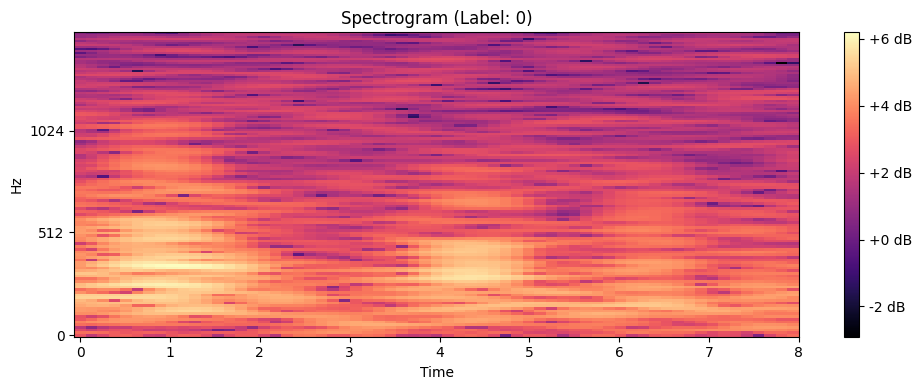

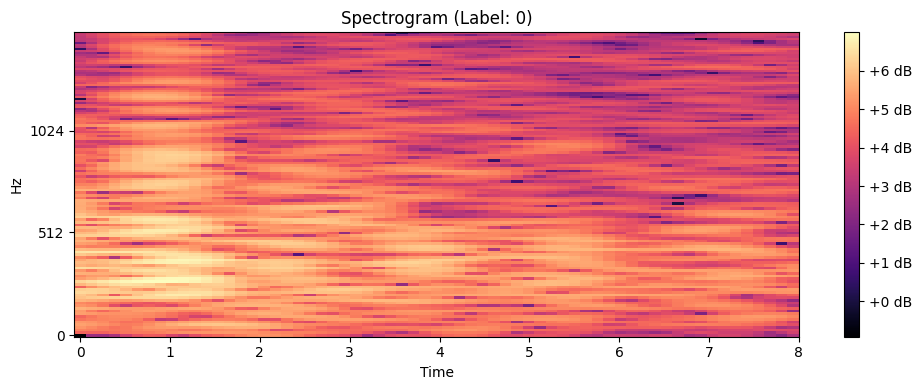

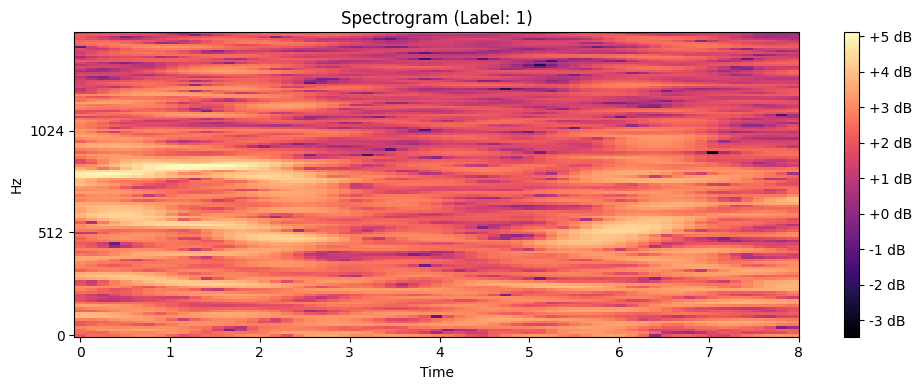

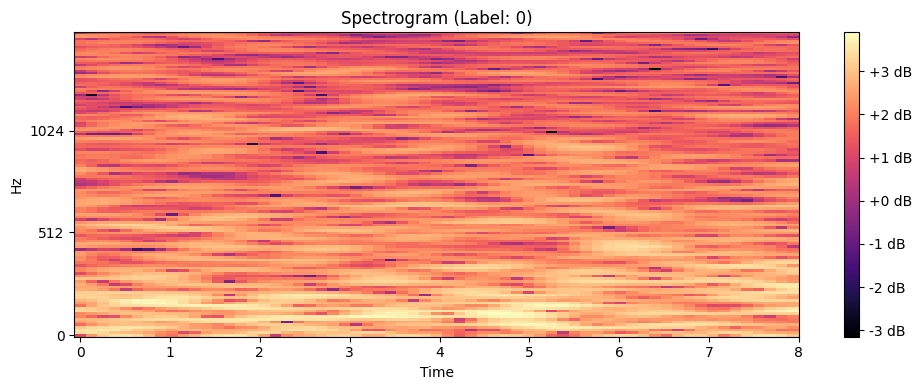

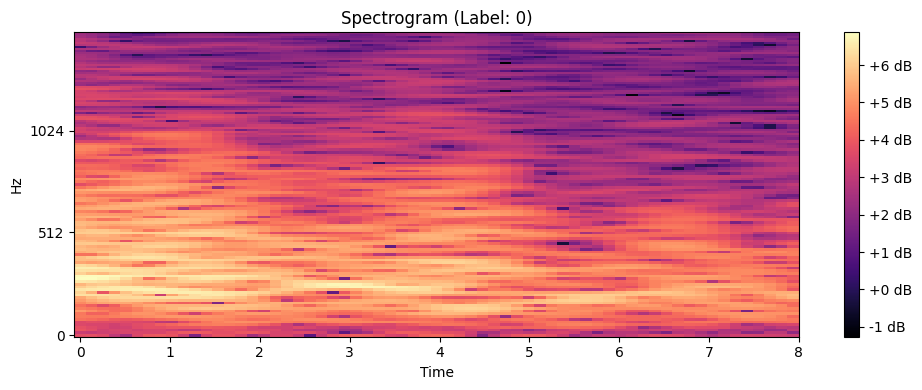

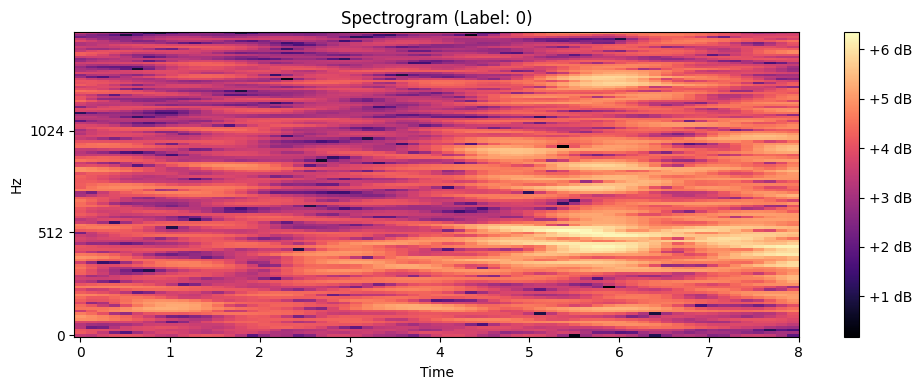

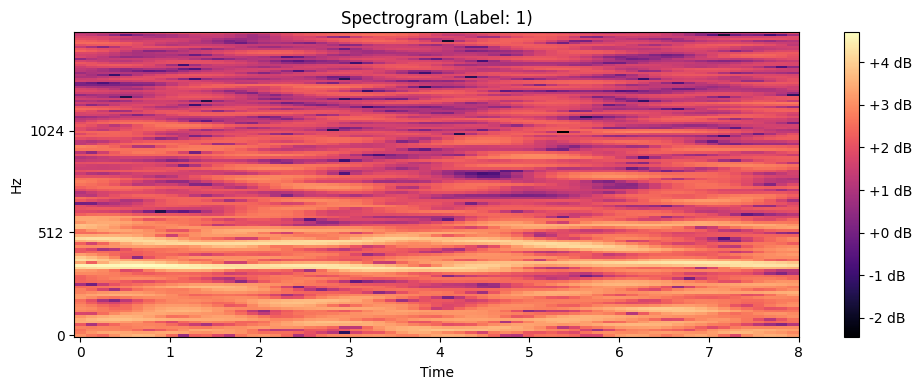

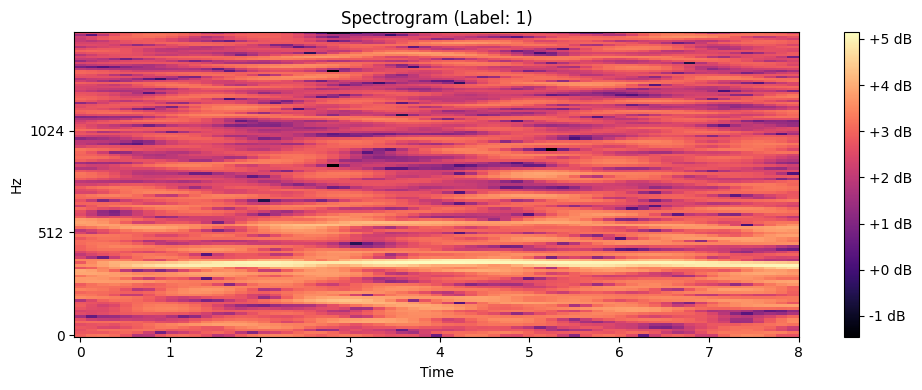

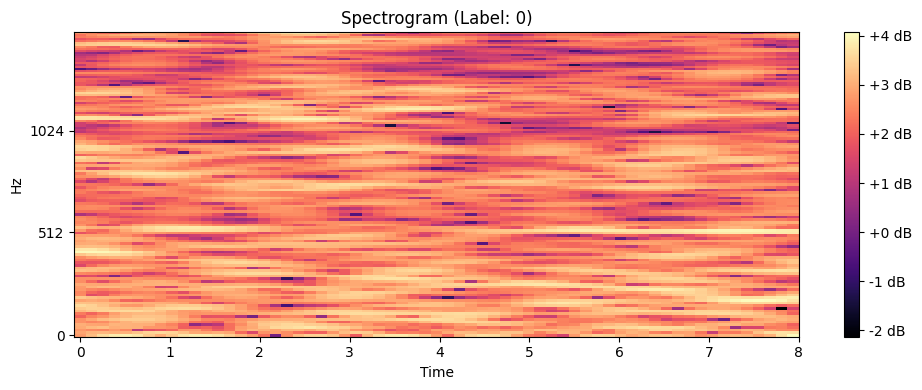

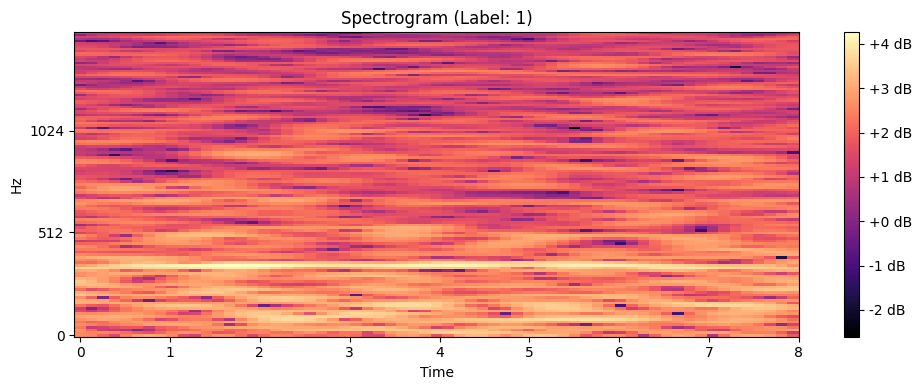

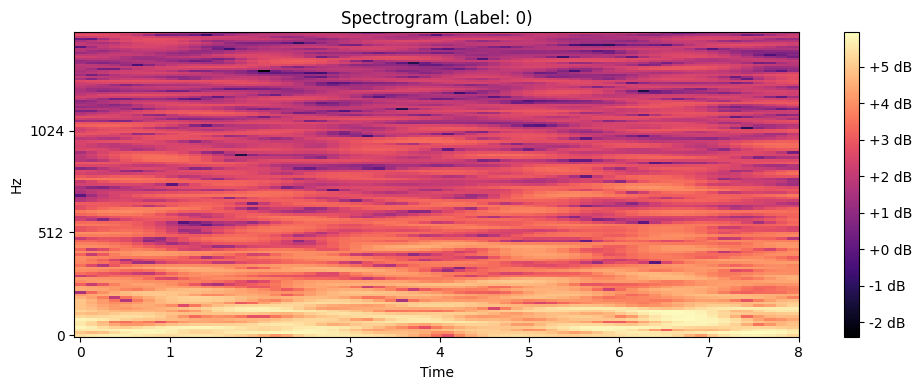

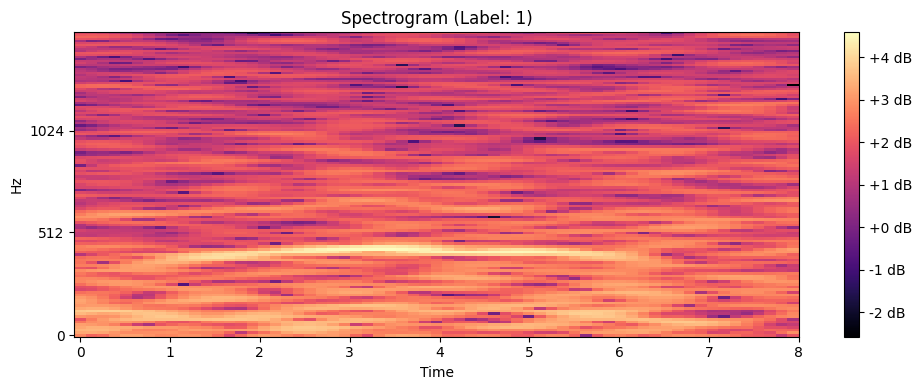

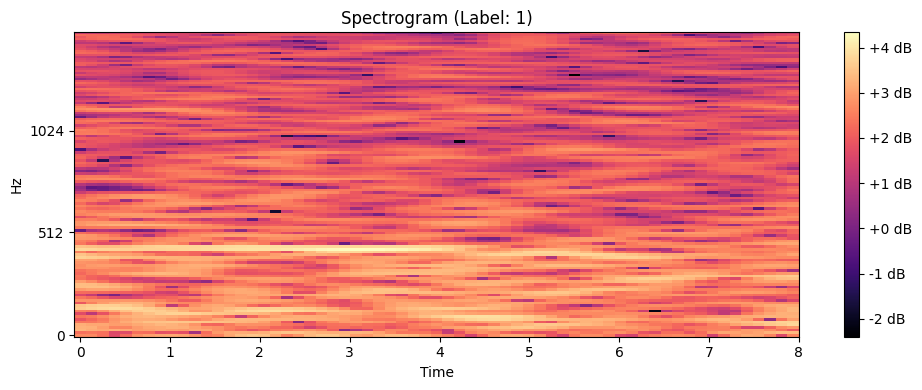

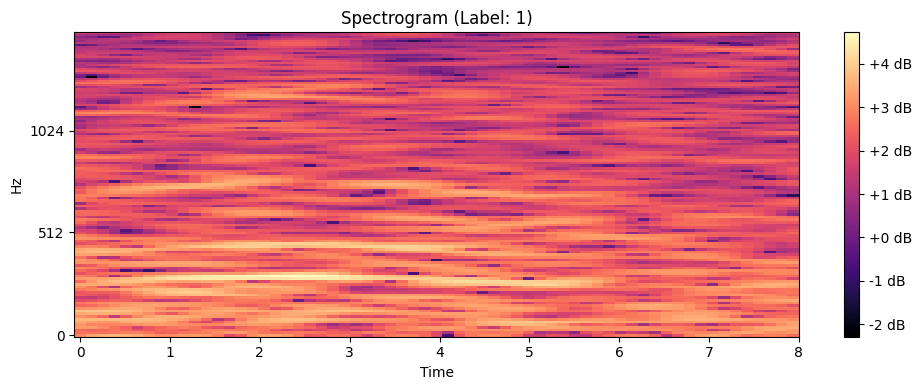

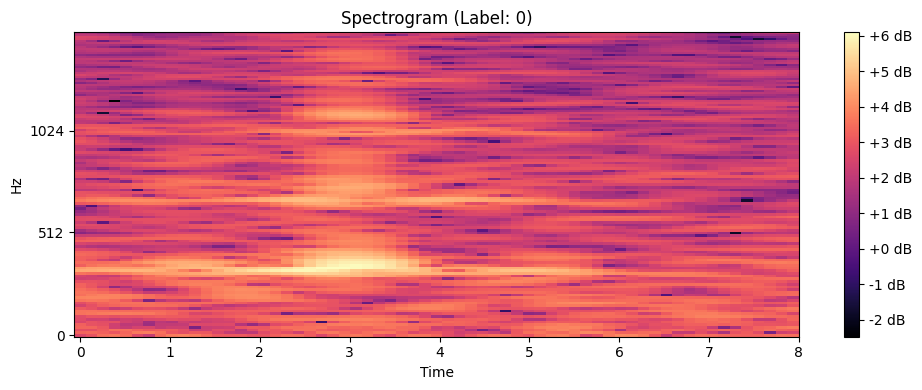

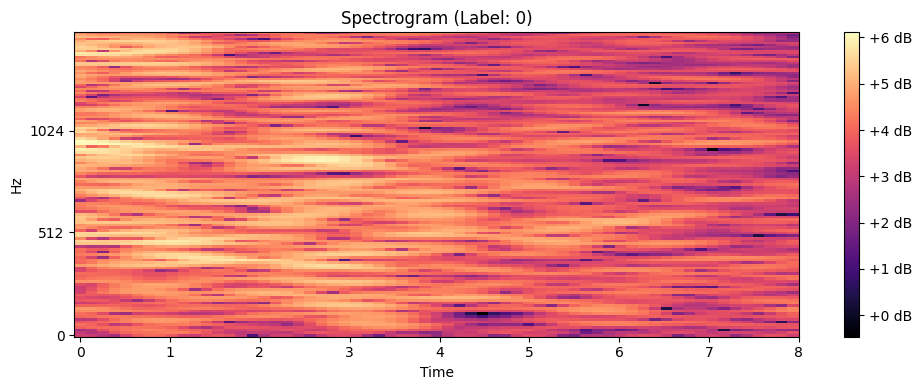

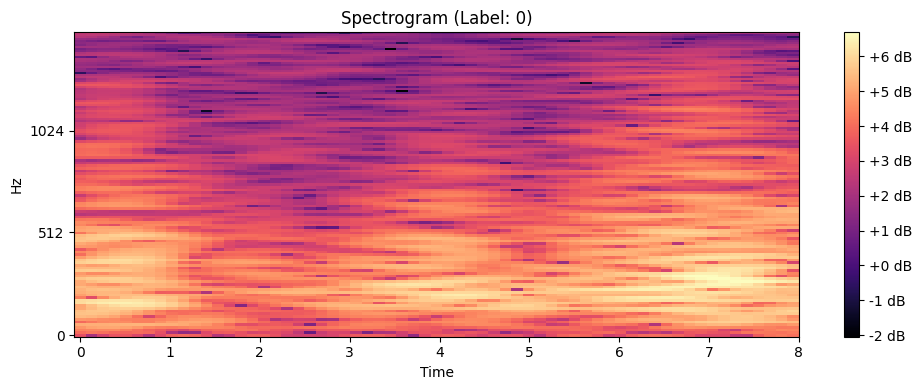

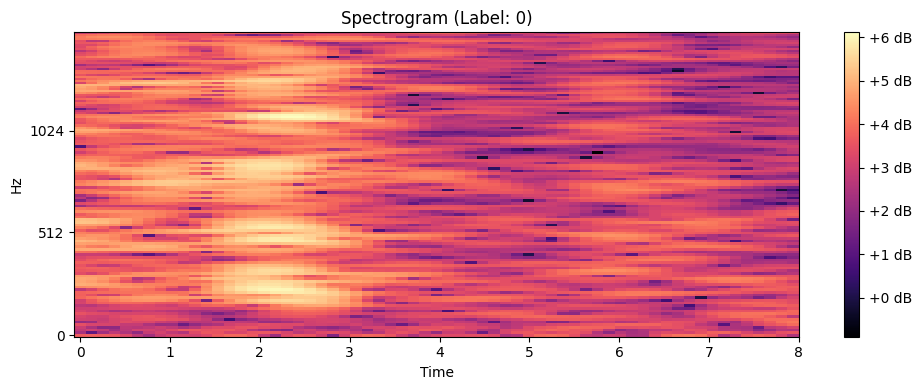

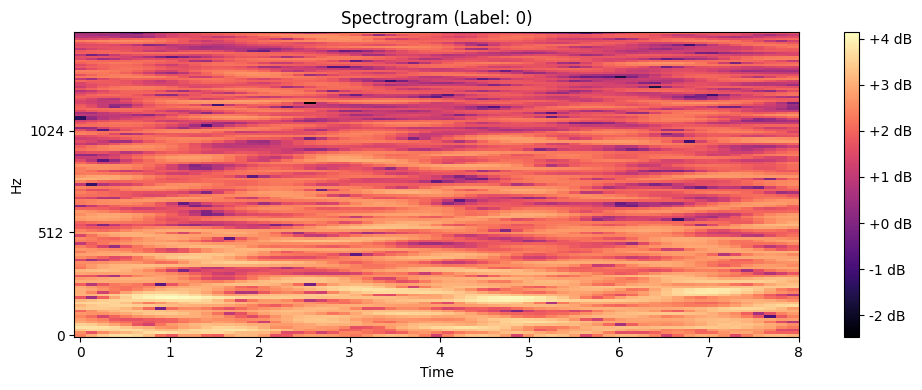

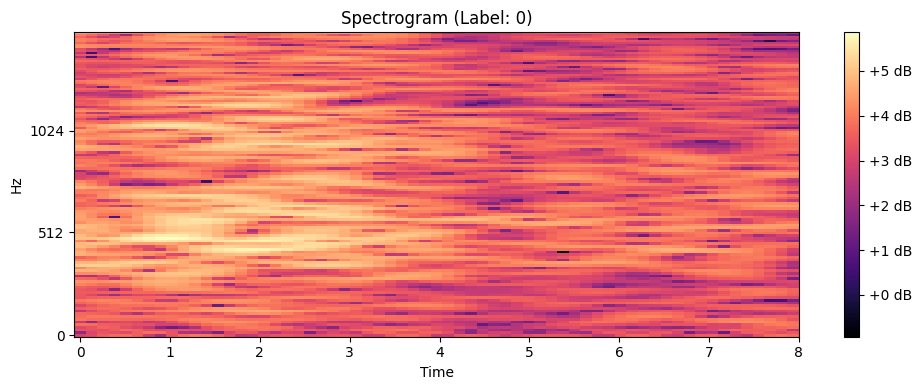

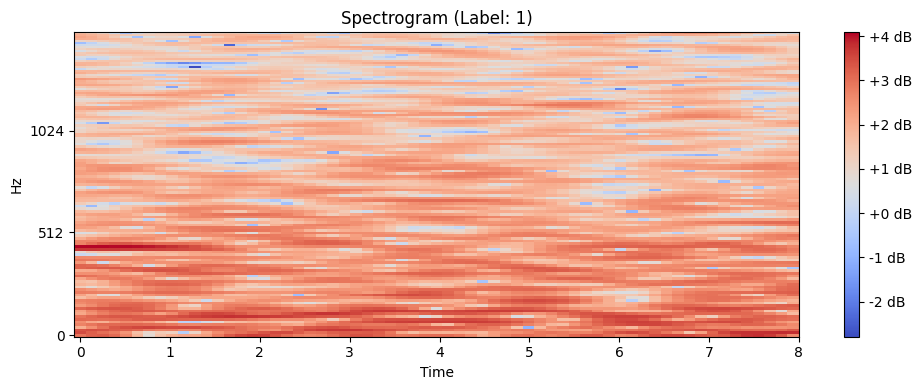

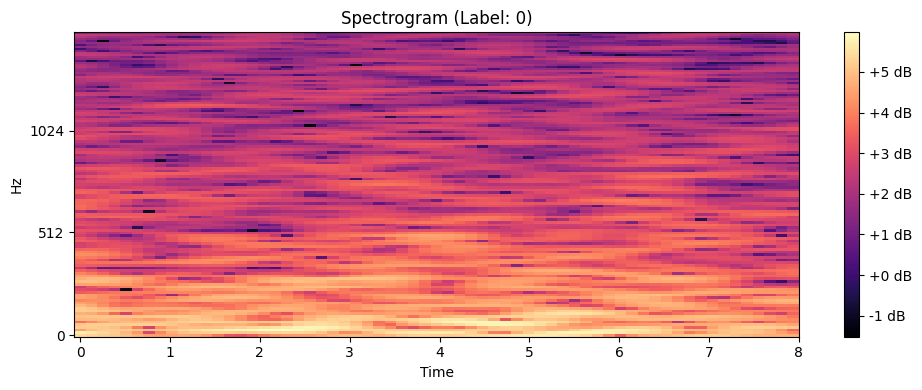

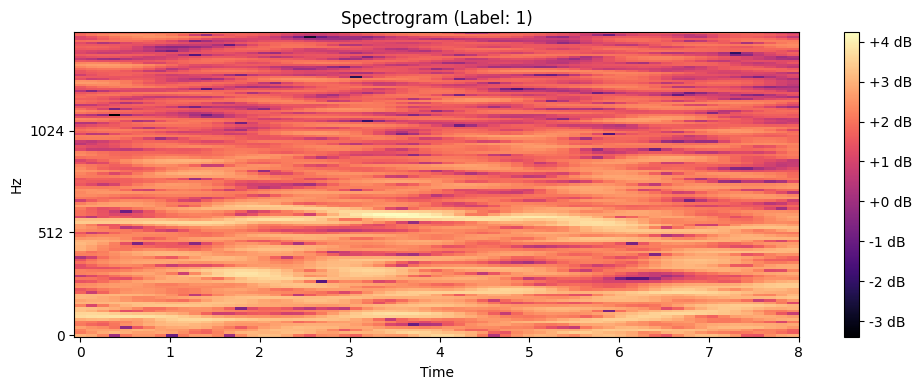

In [10]:
import tensorflow as tf
import librosa
import numpy as np
import matplotlib.pyplot as plt

def read_tfrecords(file_name, buffer_size=1000):
    '''
    Input:
        file_name:  File name to read records from.
    Output:
        dataset:    TFRecordDataset.
    '''
    
    features = {
        'sample': tf.io.FixedLenFeature([], tf.string),  
        'label': tf.io.FixedLenFeature([], tf.int64)
    }
    
    def _parse_function(example_proto):
        """Parse a serialized Example."""
        parsed = tf.io.parse_single_example(example_proto, features)
        # Deserialize tensors
        sample = tf.io.parse_tensor(parsed['sample'], out_type=tf.float32)
        label = parsed['label']

        return sample, label
    
    data = tf.data.TFRecordDataset(file_name, buffer_size=buffer_size)
    dataset = data.map(_parse_function)

    return dataset

# Assuming 'file_name' is defined and points to your TFRecord file
file_name = '/home/lrbutler/Desktop/ELP_CNN_Spectrogram/spectrogram_tfrecords/spectrogram_audio_test.tfrecord'
dataset = read_tfrecords(file_name)

count = 0
for sample, label in dataset:
    sample_np = sample.numpy()
    sample_np = np.squeeze(sample_np, axis=2).T
    # Compute the spectrogram
    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(sample_np, sr=4000, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram (Label: {label.numpy()})')
    plt.tight_layout()
    plt.show()

    count += 1

    if count == 25:
        break
